In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r'E:\Python\Python\Data\Clean_Data.csv')

Các biểu đồ thể hiện những chú thích được sử dụng trong Title :

<Axes: xlabel='Title'>

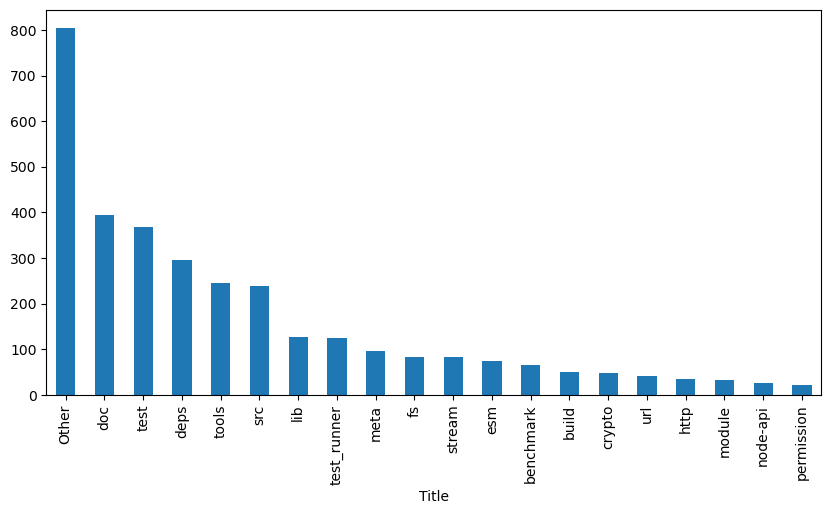

In [2]:
title = df['Title'].str.split(':').str[0]
title_counts = title.value_counts()
second_title = title.apply(lambda x: x if title_counts[x] >= 20 else 'Other')
final_title = second_title.value_counts()
plt.figure(figsize=(10, 5))
final_title.plot.bar()


Text(0.5, 1.0, 'Biểu đồ thể hiện tỉ lệ chú thích tiêu đề được sử dụng')

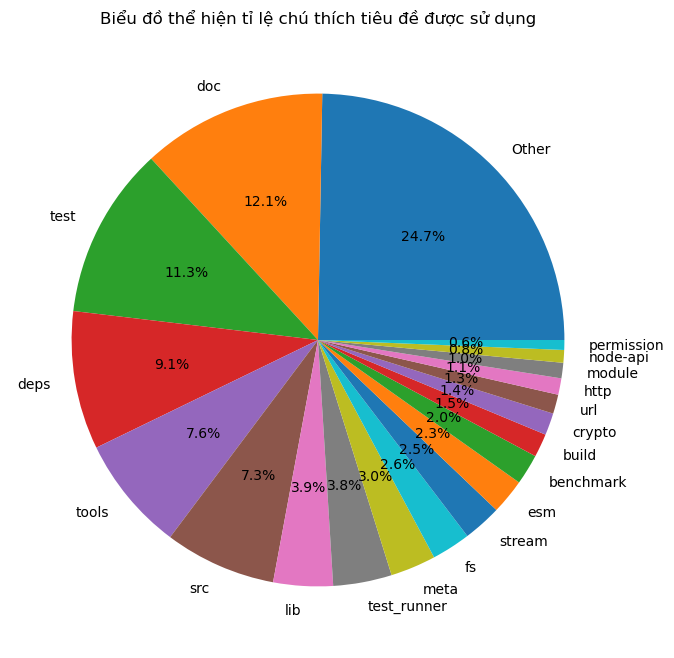

In [3]:
plt.figure(figsize=(8, 8))  
plt.pie(final_title, labels=final_title.index, autopct='%1.1f%%', startangle=0)
plt.title('Biểu đồ thể hiện tỉ lệ chú thích tiêu đề được sử dụng')


Biểu đồ thể hiện số từ của Title:

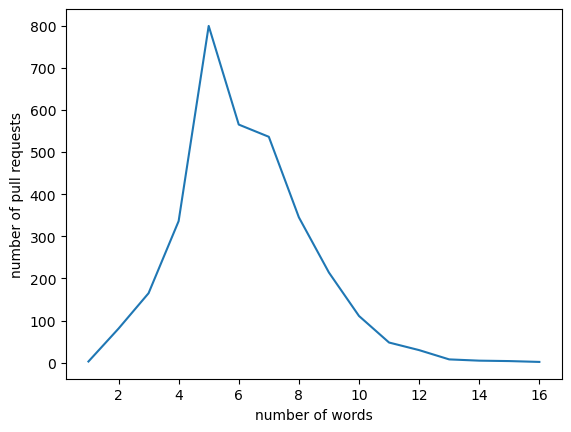

In [4]:
number_word = df['Title'].str.split(' ').str.len().value_counts().sort_index()
plt.ylabel('number of pull requests')
plt.xlabel('number of words')
plt.plot(number_word.index, number_word.values)

Số Additions,Commits,Comments thông qua các pull requests tạo trong năm 2023:

Text(0, 0.5, 'Additions')

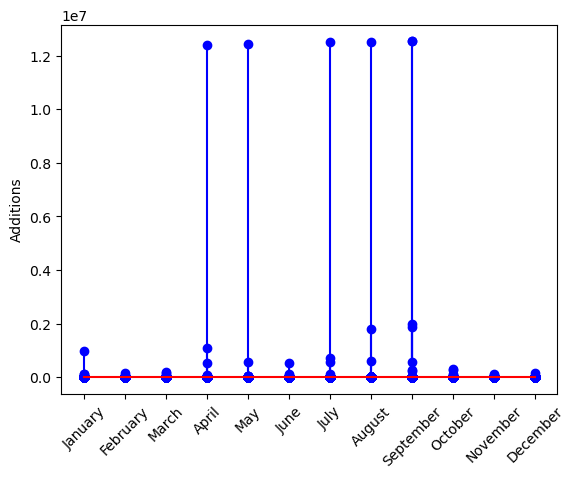

In [5]:
df['Created At'] = pd.to_datetime(df['Created At'])

df['Month'] = df['Created At'].dt.strftime('%B')

plt.stem(df['Month'],df['Additions'], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(rotation=45)
plt.ylabel('Additions')


Text(0, 0.5, 'Commits')

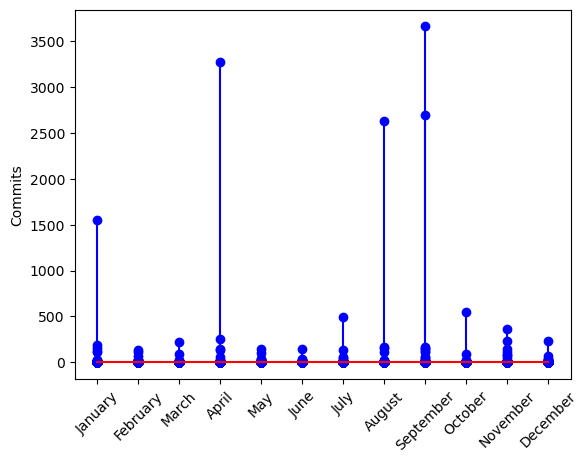

In [6]:
plt.stem(df['Month'],df['Commits'], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(rotation=45)
plt.ylabel('Commits')

Text(0, 0.5, 'Comments')

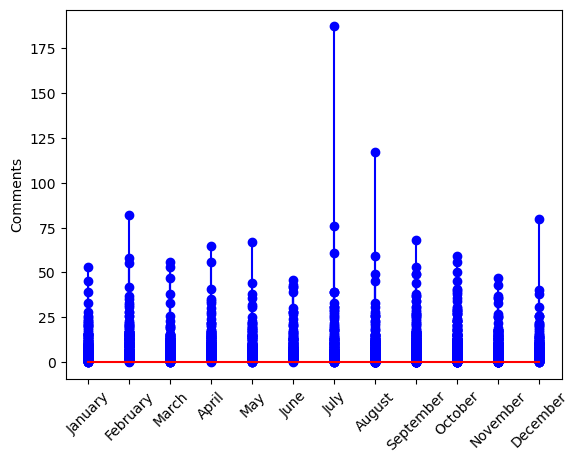

In [7]:
plt.stem(df['Month'],df['Comments'], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(rotation=45)
plt.ylabel('Comments')

Biểu đồ thể hiện mối liên hệ giữa Addtions, Commits và Comments

<Axes: >

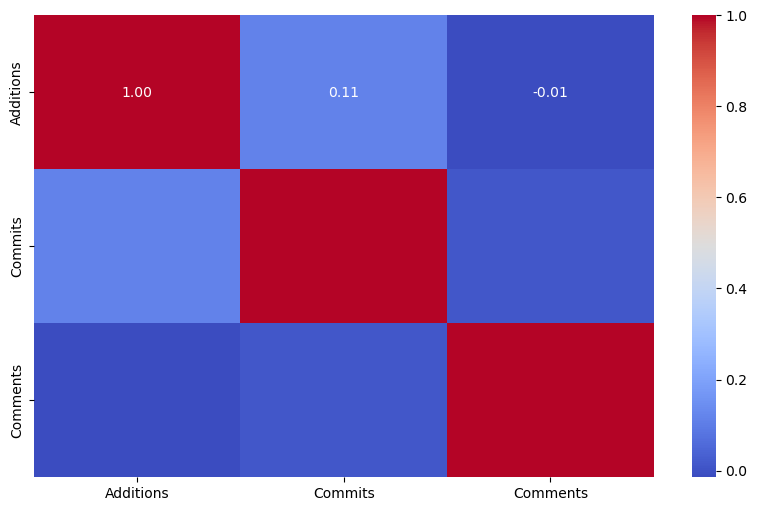

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(df[['Additions','Commits','Comments']].corr(),annot = True, cmap = 'coolwarm', fmt = ".2f")

Các trạng thái của pull requests

([<matplotlib.patches.Wedge at 0x21738e57710>,
 [Text(-0.4155461062071285, 1.0184897808108306, 'Merged'),
  Text(0.2558597275025276, -1.0698297994738848, 'Closed'),
  Text(1.0872111097313089, -0.1672483269776295, 'Open')],
 [Text(-0.22666151247661553, 0.5555398804422712, '62.3%'),
  Text(0.13955985136501503, -0.5835435269857553, '32.8%'),
  Text(0.5930242416716229, -0.09122636016961608, '4.9%')])

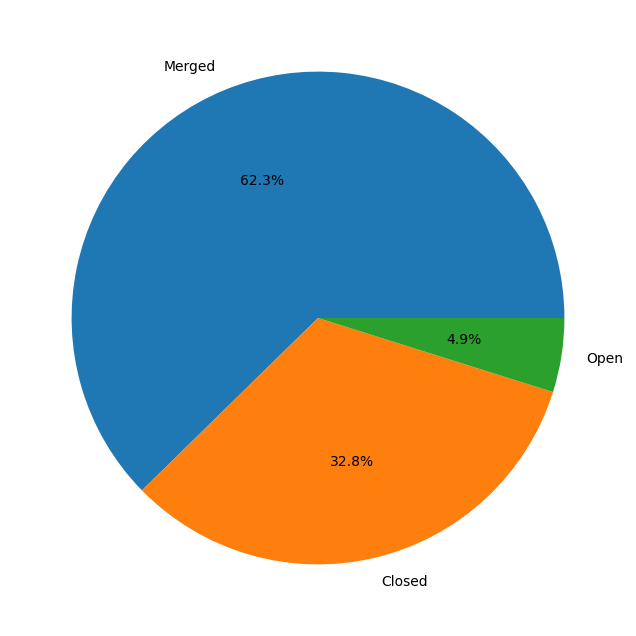

In [ ]:
df_status = df['Status'].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(df_status, labels=df_status.index, autopct='%1.1f%%', startangle=0)

Pull requests nào Merged nhanh nhất :

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14720\2981923641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mer['Merged At'] = pd.to_datetime(df_mer['Merged At'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14720\2981923641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mer['Time Difference'] = (df_mer['Merged At'] - df_mer['Created At']).dt.total_seconds()/86400


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'H4ad'),
  Text(1, 0, 'Trott'),
  Text(2, 0, 'rluvaton'),
  Text(3, 0, 'atlowChemi'),
  Text(4, 0, 'cjihrig'),
  Text(5, 0, 'MoLow'),
  Text(6, 0, 'KhafraDev'),
  Text(7, 0, 'marco-ippolito'),
  Text(8, 0, 'Trott'),
  Text(9, 0, 'bnb')])

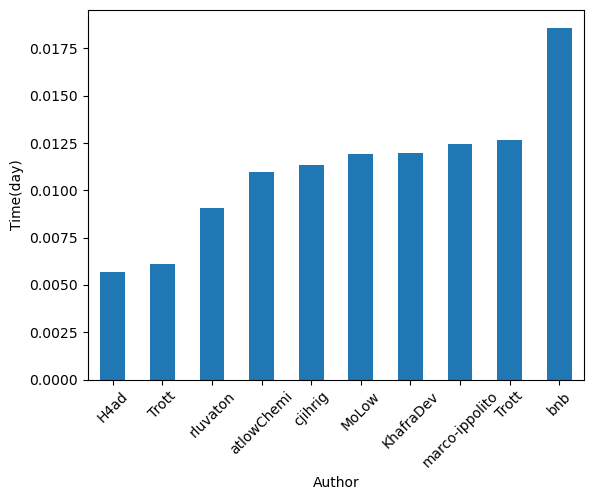

In [ ]:
df['Created At'] = pd.to_datetime(df['Created At'])
df_mer = df[df['Merged At'] != '0']
df_mer['Merged At'] = pd.to_datetime(df_mer['Merged At'])
df_mer.set_index('Author', inplace = True)

df_mer['Time Difference'] = (df_mer['Merged At'] - df_mer['Created At']).dt.total_seconds()/86400

df_mer['Time Difference'].sort_values().head(10).plot.bar()
plt.ylabel('Time(day)')
plt.xlabel('Author')
plt.xticks(rotation=45)


Text(0, 0.5, 'Time(day)')

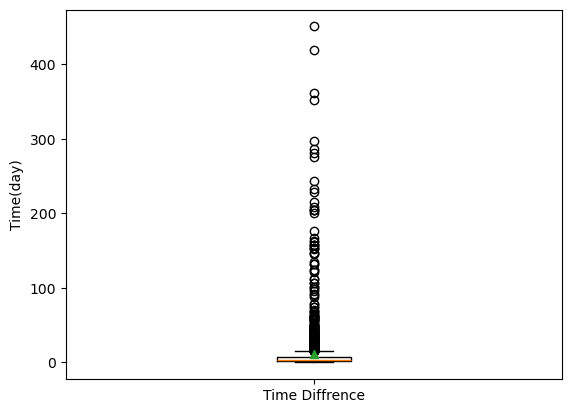

In [ ]:
plt.boxplot(df_mer['Time Difference'],labels = ['Time Diffrence'],showmeans=True)
plt.ylabel('Time(day)')


Cập nhật(Updated at)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaco

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


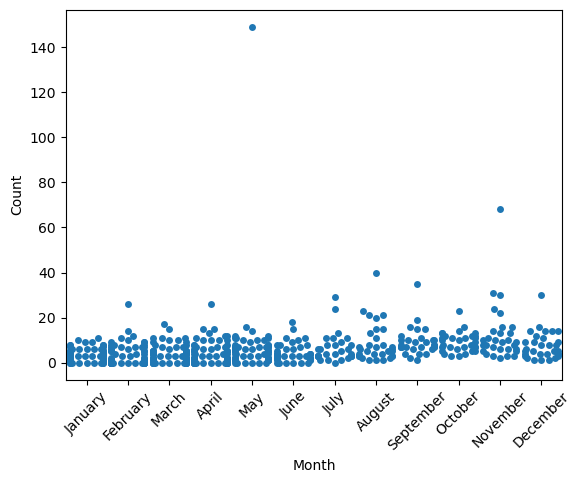

In [ ]:
df['Updated At'] = pd.to_datetime(df['Updated At'])

df_up = df.set_index('Updated At').resample('D').size().reset_index(name='Count')

df_up['Month'] = df_up['Updated At'].dt.strftime('%B')

sns.swarmplot(x='Month', y='Count', data=df_up)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'nodejs-github-bot'),
  Text(1, 0, 'aduh95'),
  Text(2, 0, 'anonrig'),
  Text(3, 0, 'joyeecheung'),
  Text(4, 0, 'tniessen'),
  Text(5, 0, 'MoLow'),
  Text(6, 0, 'RafaelGSS'),
  Text(7, 0, 'panva'),
  Text(8, 0, 'targos'),
  Text(9, 0, 'deokjinkim')])

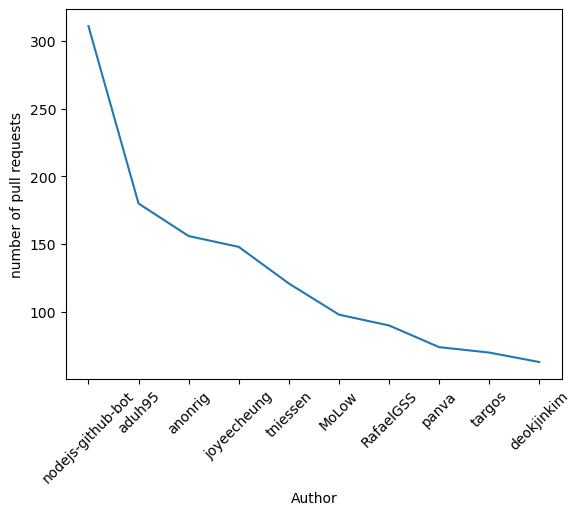

In [18]:
df_author = df.set_index('Author')
plt.plot(df_author.index.value_counts().head(10))
plt.ylabel('number of pull requests')
plt.xlabel('Author')
plt.xticks(rotation=45)